# Implementing KNN to classify spam/non-spam emails

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('data/X.csv',header=None)
y = pd.read_csv('data/y.csv',header=None)

In [3]:
y.columns = ['y']

In [4]:
data = pd.concat([X,y],axis=1)

Shuffle the whole dataset

In [5]:
s_data = data.sample(frac=1).reset_index(drop=True)

## Split data for 10 fold cross validation

In [6]:
cv_groups = []
s = 0
for i in range(1,11):
    e = s + 460
    inter = s_data.iloc[s:e,:]
    cv_groups.append(inter)
    s = e

## KNN Implementation with 10 fold CV

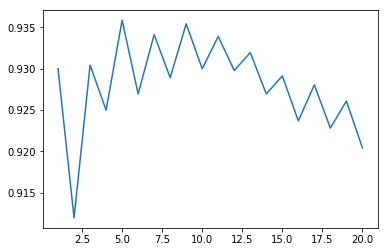

In [7]:
# implement 10 fold cv

def knn(k):
    #parent_dist = []
    accuracy = []

    for i in range(0,10):
        cv_g = cv_groups.copy()
        hold_out = cv_g[i]
        del cv_g[i]
        train = pd.concat(cv_g)
        train.index = range(len(train.index))
        ypred = []
        
        for hind, hrow in hold_out.iterrows():
            dist = np.matrix(np.absolute(np.array(train)-np.array(hrow))).sum(axis=1)
            indices = np.array(dist).argsort(axis=None)[:k]
            
            #find the label of the train point that is nearest to the test point
            labels = []
            for m in indices:
                labels.append(int(train.loc[m,'y']))

            if labels.count(1) > labels.count(0):
                ypred.append(1)
            if labels.count(1) == labels.count(0):
                ypred.append(np.random.randint(0,1,1))
            if labels.count(1) < labels.count(0):
                ypred.append(0)

       # find model accuracy
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        y = hold_out.iloc[:,-1]

        for u,v in zip(list(y),ypred):
            
            if (u==v==0):
                tn += 1
            if (u==v==1):
                tp += 1
            if ((u == 0) & (v == 1)):
                fp += 1
            if ((u == 1) & (v == 0)):
                fn += 1

        accuracy.append((tp+tn)/(tp+tn+fp+fn))
    return sum(accuracy)/float(len(accuracy))

acc = []
for k in range(1,21):
    acc.append(knn(k))


Text(0, 0.5, 'Accuracy')

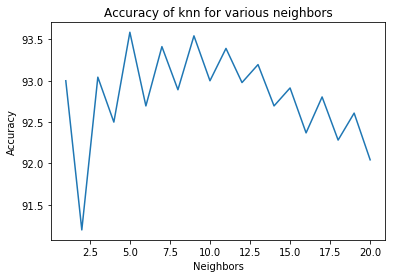

In [10]:
plt.plot(range(1,21),np.multiply(100,acc))
plt.title("Accuracy of knn for various neighbors")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")